In [5]:
import pandas as pd 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv("delivery_time.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

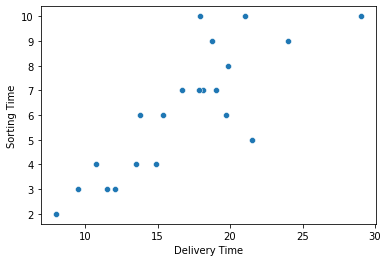

In [13]:
sns.scatterplot(x=data['Delivery Time'],y=data['Sorting Time'])

## Correlation

In [16]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

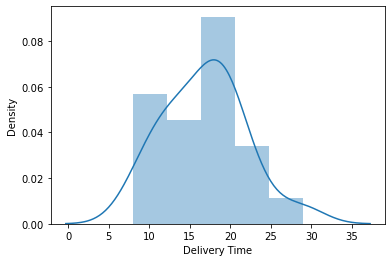

In [19]:
sns.distplot(data['Delivery Time'])


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

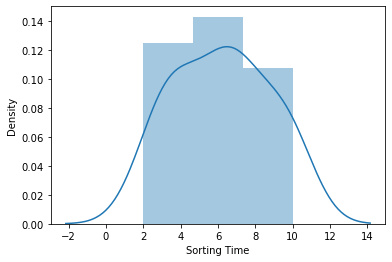

In [20]:
sns.distplot(data['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

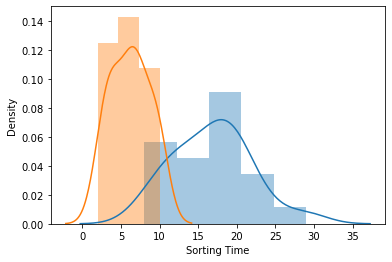

In [21]:
sns.distplot(data['Delivery Time'])
sns.distplot(data['Sorting Time'])

## fitting the linerar model 

In [25]:
import statsmodels.formula.api as smf
model = smf.ols("data['Delivery Time']~data['Sorting Time']",data = data).fit()

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

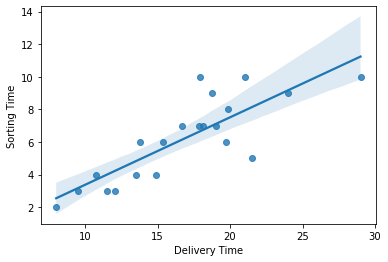

In [33]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=data)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Sun, 20 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                           21:25:39   Log-Likelihood:                -51.357
No. Observations:                     21   AIC:                             106.7
Df Residuals:                         19   BIC:                             108.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5827      1.722      3.823      0.001       2.979      10.186
data['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(model.tvalues)

Intercept               3.823349
data['Sorting Time']    6.387447
dtype: float64


In [37]:
print(model.pvalues)

Intercept               0.001147
data['Sorting Time']    0.000004
dtype: float64


In [38]:
model.rsquared,model.rsquared_adj  # 0.68% 

(0.6822714748417231, 0.6655489208860244)